# Implementing K-means Clustening

## Table of contents
1. [Euclidean Distance Function](#Euclidean-Distance-Function)
2. [Manhattan Distance Function](#Manhattan-Distance-Function)
3. [Cluster Membership Function](#Cluster-Membership-Function)
4. [K-means Function](#K-means-Function)
5. [Trying K-means custom function](#Trying-K-means-custom-function)
6. [Plotting K-means algorithm](#Plotting-K-means-algorithm)
7. [The Silhoutte score and how is calculated](#The-Silhoutte-score-and-how-is-calculated)

In [1]:
#Libraries to import
import math
import numpy as np
from scipy.spatial.distance import cdist
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

### Euclidean Distance Function
***
$d((x,y),(a,b))=\sqrt{(x-a)^2+(y-b)^2}$

>Using NumPy or the math package and the Euclidean distance formula, write a function that calculates the distance between two coordinates.

In [2]:
def euclidean(a,b):
    return math.sqrt(math.pow(a[0]-b[0],2) + math.pow(a[1]-b[1],2))

In [3]:
#Test the function
centroids = [(2, 5), (8, 3), (4,5)]
arbitrary_x = (0, 8)
centroid_distances = []
for coordinate in centroids:
    print("Euclidean Distance between x {} and coordinate {} is {}".format(arbitrary_x ,coordinate, euclidean(arbitrary_x,coordinate)))
    centroid_distances.append(euclidean(arbitrary_x,coordinate))

Euclidean Distance between x (0, 8) and coordinate (2, 5) is 3.605551275463989
Euclidean Distance between x (0, 8) and coordinate (8, 3) is 9.433981132056603
Euclidean Distance between x (0, 8) and coordinate (4, 5) is 5.0


### Manhattan Distance Function
***
$(p,q) = \sum \limits _{i=1} ^{n}|(p_{i}-q_{i})$|
>Using NumPy or the math package and the Manhattan distance formula, write a function that calculates the distance between two coordinates.

In [4]:
def manhattan(a,b):
    return np.abs((a[0]-b[0])+(a[1]-b[1]))

In [5]:
#Test the function
centroids = [(2, 5), (8, 3), (4,5)]
arbitrary_x = (0, 8)
centroid_distances = []
for coordinate in centroids:
    print("Manhattan Distance between x {} and coordinate {} is {}".format(arbitrary_x ,coordinate, manhattan(arbitrary_x,coordinate)))
    centroid_distances.append(manhattan(arbitrary_x,coordinate))

Manhattan Distance between x (0, 8) and coordinate (2, 5) is 1
Manhattan Distance between x (0, 8) and coordinate (8, 3) is 3
Manhattan Distance between x (0, 8) and coordinate (4, 5) is 1


### Cluster Membership Function 
***
>Cluster membership refers to where the points go as the algorithm processes the data.

In [6]:
#Calculate the mean point between all of the points to find the new centroid.
def cluster_membership(X, distance):
    if distance == 'euclidean':
        for coordinate in X:
            calcs = cdist(coordinate.reshape([1,-1]),centroids, metric='euclidean').squeeze()
            print(calcs, "Cluster Membership: ", np.argmin(calcs))
    elif distance == 'manhattan':
        for coordinate in X:
            calcs = cdist(coordinate.reshape([1,-1]),centroids, metric='cityblock').squeeze()
            print(calcs, "Cluster Membership: ", np.argmin(calcs))

### K-means Function
***
>Write a k-means function that takes in a dataset and the number of clusters (K) and returns the final cluster centroids, as well as the data points that make up that cluster's membership. This function should take in the choice of distance metric (Euclidean or Manhattan) as a parameter

In [8]:
def k_means(X, K, distance):
    # Keep track of history so you can see K-Means in action
    centroids_history = []
    labels_history = []
    
    # Randomly initialize Kcentroids
    rand_index = np.random.choice(X.shape[0], K)  
    centroids = X[rand_index]
    centroids_history.append(centroids)
    
    # While loop repeats process until difference between new/old centroids = 0 
    while True:
        # Euclidean distances are calculated for each point relative to centroids, and then np.argmin returns
        # the index location of the minimal distance - which cluster a point is assigned to
        if distance == 'euclidean':
            labels = np.argmin(cdist(X, centroids, metric='euclidean'), axis=1)
            labels_history.append(labels)
            # Take mean of points within clusters to find new centroids
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(K)])
            centroids_history.append(new_centroids)
        elif distance == 'manhattan':
            labels = np.argmin(cdist(X, centroids, metric='manhattan'), axis=1)
            labels_history.append(labels)
            # Take mean of points within clusters to find new centroids
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(K)])
            centroids_history.append(new_centroids)
        else: 
            print(' ')
        # If old centroids and new centroids no longer change, K-Means is complete and end. Otherwise continue
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return centroids, labels, centroids_history, labels_history

### Trying K-means custom function
***
>Apply your custom algorithm to the seeds dataset

In [9]:
seeds = pd.read_csv('Seed_Data.csv')
seeds

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2


In [10]:
#Drop the target column
seeds.drop(['target'], axis=1, inplace=True)

In [11]:
seeds

,A,P,C,LK,WK,A_Coef,LKG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [12]:
# Convert from Pandas dataframe to NumPy matrix
X_mat = seeds.values

In [13]:
X_mat

array([[15.26  , 14.84  ,  0.871 , ...,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811, ...,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 , ...,  3.337 ,  2.699 ,  4.825 ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  3.232 ,  8.315 ,  5.056 ],
       [11.84  , 13.21  ,  0.8521, ...,  2.836 ,  3.598 ,  5.044 ],
       [12.3   , 13.34  ,  0.8684, ...,  2.974 ,  5.637 ,  5.063 ]])

In [14]:
# Run our Seeds matrix through the k_means function we created earlier
centroids, labels, centroids_history, labels_history = k_means(X_mat, 3, 'euclidean')

### Plotting K-means algorithm
***
>Generate a plot to check k-means algorithm can group the different wheat species into their proper groups just based on plant characteristics, and provide comments about how well it does.

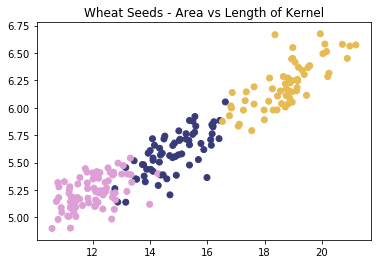

In [15]:
plt.scatter(seeds['A'], seeds['LK'], c=labels, cmap='tab20b')
plt.title('Wheat Seeds - Area vs Length of Kernel')
plt.show()

The model succesfully identified 3 distinct clusters from the seeds data based on the **Area** and **Lenght of Kernel** characterisctics .

### The Silhoutte score and how is calculated
***
>Describe how the silhouette score is calculated and explain what this metric reveals about a model. Calculate the silhouette score using the scikit-learn implementation.

$$SSIi = \frac{b_{i} - a_{i}}{max(a_{i},b_{i})}$$
***

The silhoutte score is a metric that attemps to provide some insight on the accuracy of the model, more specifically how well can the model fit points within clusters. 

Its values ranges from -1 to 1 and is calculated by divinding the difference of the distance between a given point to the nearest  closest cluster centroid $(b_{i})$ and the distance from a given point to its own cluster $(a{i})$ by the maximum value between $(max(a_{i},b_{i}))$.

In [16]:
silhouette_score(seeds[['A','LK']], labels)

0.5875704550892767

The silhouette_score for this model is 0.5444234976006911. Given that is positve, this indicates the points are closer to the assiggned to its cluster than their neighboring clusters. 